In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [ ]:
# seu código
ideb = pd.read_csv('ideb.csv',usecols=['ano','id_municipio','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb'])
pib = pd.read_csv('pib.csv',usecols=['ano','id_municipio','pib','impostos_liquidos'])

In [ ]:
# seu código
ideb.head(2)

,ano,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,1200302,167.8,165.6,2.3
1,2005,1200328,151.8,149.6,1.8


### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [ ]:
ideb_gp = ideb.groupby(by=['id_municipio','ano']).agg(
    {
        'nota_saeb_matematica':'mean',
        'nota_saeb_lingua_portuguesa':'mean',
        'ideb':'mean'
    }
)
ideb_gp = ideb_gp.reset_index()
ideb_gp.head(2)

,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,1100015,2019,253.28375,242.24625,5.0500
1,1100023,2019,248.22375,243.61875,4.7625


In [ ]:
# seu código
ideb = ideb[ideb.ano == 2019]
ideb.head(2)

,ano,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
8947,2019,1200104,288.92,263.10,8.1
8948,2019,1200104,254.78,231.63,6.8


### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [ ]:
# seu código
pib = pib[pib.ano == 2019]
pib.head(2)

,ano,id_municipio,pib,impostos_liquidos
94616,2019,1100015,495628767,29350985
94617,2019,1100023,2578829725,284397627


In [ ]:
pib_gp = pib.groupby(by=['id_municipio','ano']).agg(
    {
        'pib':'mean',
        'impostos_liquidos':'mean'
    }
).reset_index()
pib_gp.head(2)

,id_municipio,ano,pib,impostos_liquidos
0,1100015,2002,111290995.0,7549266.0
1,1100015,2003,143222381.0,10511613.0


### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [ ]:
# seu código
df = pd.merge(left=ideb_gp,right=pib_gp,how='left',left_on=['id_municipio','ano'],right_on=['id_municipio','ano'])
df.head(2)

,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
0,1100015,2019,253.28375,242.24625,5.0500,4.956288e+08,29350985.0
1,1100023,2019,248.22375,243.61875,4.7625,2.578830e+09,284397627.0


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [ ]:
# seu código
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_municipio                 5570 non-null   int64  
 1   ano                          5570 non-null   int64  
 2   nota_saeb_matematica         5549 non-null   float64
 3   nota_saeb_lingua_portuguesa  5549 non-null   float64
 4   ideb                         5549 non-null   float64
 5   pib                          5570 non-null   float64
 6   impostos_liquidos            5570 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 348.1 KB


In [ ]:
# seu código
df[df.nota_saeb_matematica.isnull()].head()

,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
833,2208601,2019,NaN,NaN,NaN,25170709.0,1165094.0
2052,2918902,2019,NaN,NaN,NaN,71455084.0,2660487.0
3026,3166600,2019,NaN,NaN,NaN,19107326.0,575566.0
3891,3555703,2019,NaN,NaN,NaN,44829500.0,1198001.0
4340,4202081,2019,NaN,NaN,NaN,79440521.0,4064546.0


In [ ]:
df.drop(columns=['ano'],inplace=True)

In [ ]:
df.dropna(inplace=True)

### Atividade 5: Quais são os tipos das variáveis do DataFrame?

In [ ]:
df.dtypes

id_municipio                     int64
nota_saeb_matematica           float64
nota_saeb_lingua_portuguesa    float64
ideb                           float64
pib                            float64
impostos_liquidos              float64
dtype: object

id_municipio : variável qualitativa nominal \
nota_saeb_matematica : variável quantitativas contínua \
nota_saeb_lingua_portuguesa : variável quantitativas contínua \
ideb : variável quantitativas contínua \
pib : variável quantitativas contínua \
impostos_liquidos : variável quantitativas contínua 



### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [ ]:
df.describe()

,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
count,5.549000e+03,5549.000000,5549.000000,5549.000000,5.549000e+03,5.549000e+03
mean,3.250065e+06,249.177030,242.390443,4.859137,1.331320e+09,1.860485e+08
std,9.841557e+05,19.982548,18.284378,0.742613,1.272031e+10,2.273048e+09
min,1.100015e+06,172.770000,157.670000,2.300000,1.551527e+07,3.475460e+05
25%,2.511905e+06,235.068333,230.206667,4.300000,8.787352e+07,3.852048e+06
50%,3.145703e+06,250.691429,244.280000,4.933333,1.926062e+08,1.099393e+07
75%,4.118303e+06,263.570000,255.812857,5.416667,5.111565e+08,4.056357e+07
max,5.300108e+06,329.200000,316.610000,7.650000,7.638060e+11,1.324779e+11


<Axes: xlabel='ideb', ylabel='pib'>

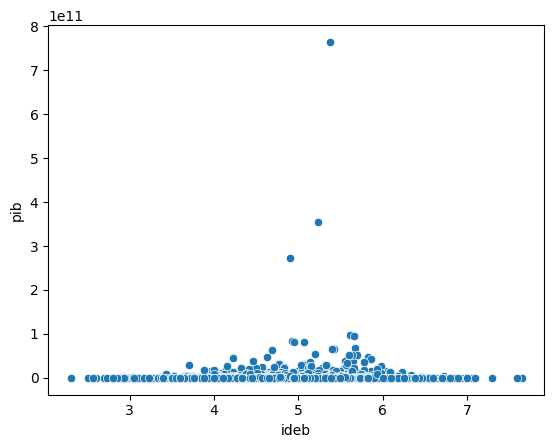

In [ ]:
# seu código
sns.scatterplot(data=df,x='ideb',y='pib')

In [ ]:
df[['ideb','pib']].corr()

,ideb,pib
ideb,1.000000,0.037105
pib,0.037105,1.000000


Há uma correlação baixa de cerca de 3% positiva.

### O que significa a correlação das variáveis `id_municipio` e `ideb`?

É um calculo que não faz sentido, dados que id_municipio é uma variável categórica e o ideb uma variável contínua.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e procurar por correlações entre algumas das colunas.

In [ ]:
# seu código
seg_rj = pd.read_csv('seg_rj.csv')
seg_rj.head(2)

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,...,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,...,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0


<ipython-input-21-5d2d30660079>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(seg_rj.corr(), vmin=-1, vmax=1, annot=False);


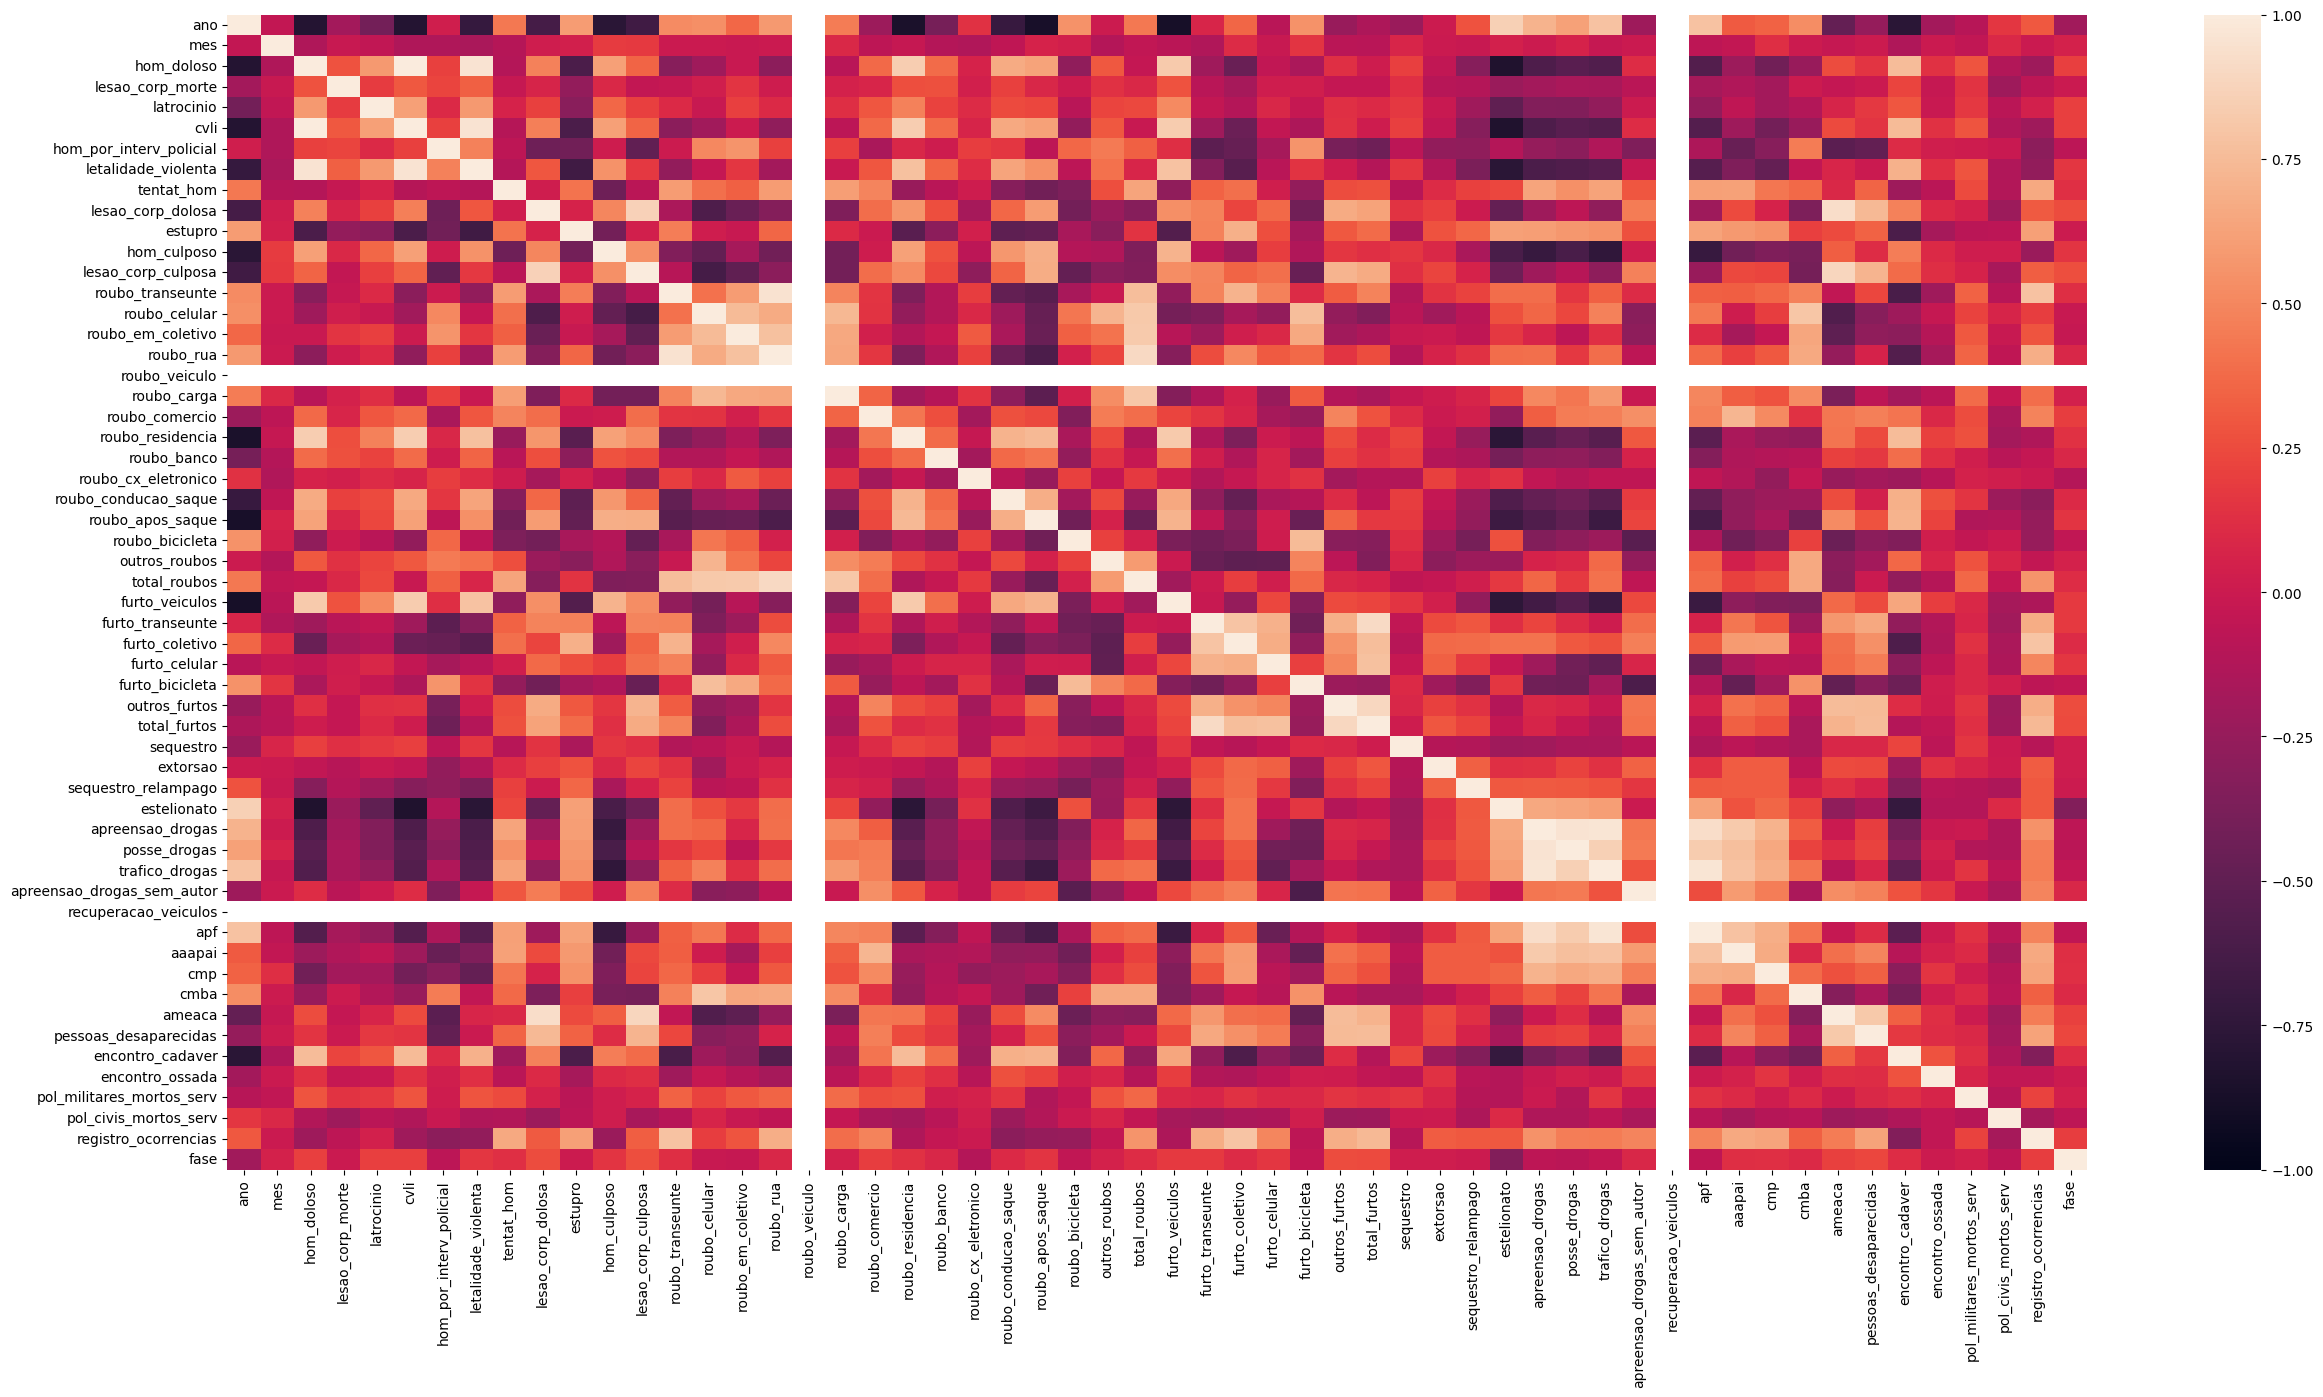

In [ ]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(seg_rj.corr(), vmin=-1, vmax=1, annot=False);
plt.show()

### Atividade 8: Selecione os dados apenas para o ano de 2020 e apenas as colunas `mês`, `hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial`, e `trafico_drogas`

In [ ]:
# seu código
seg_rj = seg_rj.loc[seg_rj.ano==2020,['mes','hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial','trafico_drogas']]

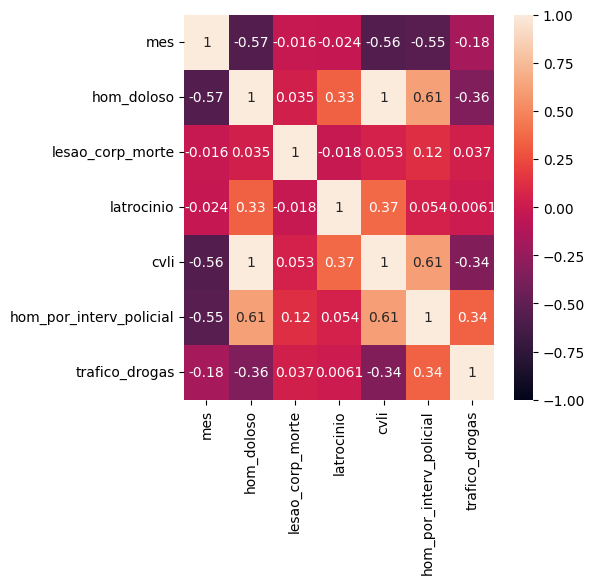

In [ ]:
# seu código
plt.figure(figsize=(5,5))
ax = sns.heatmap(seg_rj.corr(), vmin=-1, vmax=1, annot=True);
plt.show()

In [ ]:
# seu código